<a href="https://colab.research.google.com/github/raghavharshita/Text_classification/blob/main/Self_Implementation_of_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving movie_recommendation.csv to movie_recommendation.csv


In [3]:
df=pd.read_csv('movie_recommendation.csv')
stopword_list = nltk.corpus.stopwords.words('english')
updated_stopword_list = []

for word in stopword_list:
    if word=='not' or word.endswith("n't"):
        pass
    else:
        updated_stopword_list.append(word)

def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in updated_stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in updated_stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['review'] = df['review'].apply(remove_stopwords)
#this will work if we were using vectorisation
x_train,x_test,y_train,y_test=train_test_split(df.review,df.sentiment,test_size=0.2,random_state=0)

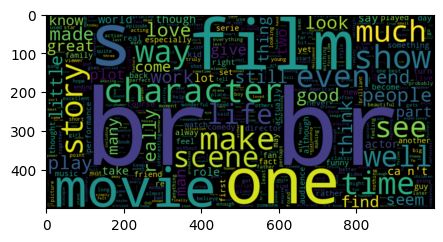

In [4]:
#word cloud for positive values
plt.figure(figsize=(5,5))
df_positive_review=df[df['sentiment']=='positive']
positive_text=' '.join(review for review in df_positive_review.review)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
positive_words = WC.generate(positive_text)
plt.imshow(positive_words, interpolation='bilinear')
plt.show()

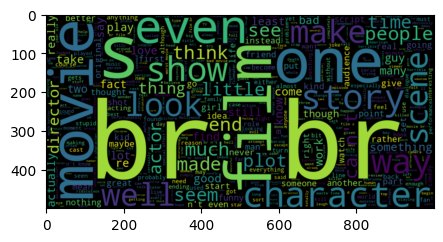

In [5]:
#word cloud for negative values
plt.figure(figsize=(5,5))
df_negative_review=df[df['sentiment']=='negative']
negative_text=' '.join(review for review in df_negative_review.review)
wc=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=wc.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

In [6]:
#making dictionary of words with the corresponding frequencies
dic={}
for word in x_train:
  stripped=re.split(r'\W+',word)
  for s in stripped:
    if not(s.isalpha()) or len(s)<=2:
      continue
    if s in dic:
      dic[s]+=1
    else:
      dic[s]=1
dic

{'redeeming': 490,
 'quality': 2050,
 'movie': 69269,
 'otherwise': 770,
 'insults': 76,
 'viewer': 1934,
 'intelligence': 471,
 'losing': 325,
 'track': 633,
 'time': 19563,
 'plot': 10066,
 'reason': 3595,
 'produced': 882,
 'Plus': 359,
 'guy': 4674,
 'glasses': 151,
 'ever': 9166,
 'got': 5609,
 'gig': 37,
 'Hollywood': 2868,
 'beyond': 1265,
 'Even': 2475,
 'not': 45803,
 'read': 2924,
 'Anne': 478,
 'Rice': 70,
 'Queen': 301,
 'Damned': 46,
 'Vampire': 195,
 'Chronicles': 40,
 'probably': 4180,
 'would': 20875,
 'still': 7788,
 'thought': 5553,
 'awful': 2572,
 'tasteless': 118,
 'less': 2905,
 'made': 12815,
 'absolutely': 2248,
 'sense': 3592,
 'sat': 454,
 'pondering': 31,
 'disassociated': 1,
 'book': 3725,
 'longer': 760,
 'worse': 2212,
 'associate': 92,
 'way': 12206,
 'prior': 276,
 'film': 62896,
 'ridiculous': 1471,
 'ridiculously': 192,
 'inconsistent': 118,
 'let': 2903,
 'alone': 1442,
 'bare': 198,
 'ideas': 894,
 'taken': 1609,
 'genius': 730,
 'butchered': 52,
 'r

In [7]:
import operator
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('movie', 69269),
 ('film', 62896),
 ('not', 45803),
 ('one', 38971),
 ('like', 30949),
 ('good', 22771),
 ('would', 20875),
 ('time', 19563),
 ('story', 17840),
 ('really', 17818),
 ('see', 17775),
 ('even', 17545),
 ('much', 14938),
 ('could', 14490),
 ('well', 14455),
 ('get', 14327),
 ('bad', 13837),
 ('people', 13669),
 ('great', 13392),
 ('made', 12815),
 ('first', 12552),
 ('make', 12512),
 ('also', 12312),
 ('way', 12206),
 ('movies', 11954),
 ('characters', 11358),
 ('think', 11103),
 ('character', 11051),
 ('films', 10886),
 ('seen', 10686),
 ('watch', 10338),
 ('many', 10081),
 ('two', 10070),
 ('plot', 10066),
 ('acting', 10008),
 ('life', 9773),
 ('know', 9758),
 ('never', 9738),
 ('show', 9544),
 ('love', 9502),
 ('best', 9342),
 ('little', 9310),
 ('ever', 9166),
 ('better', 8921),
 ('scene', 8709),
 ('end', 8459),
 ('say', 8372),
 ('scenes', 8295),
 ('something', 7803),
 ('still', 7788),
 ('man', 7781),
 ('back', 7430),
 ('real', 7245),
 ('thing', 7044),
 ('actors', 70

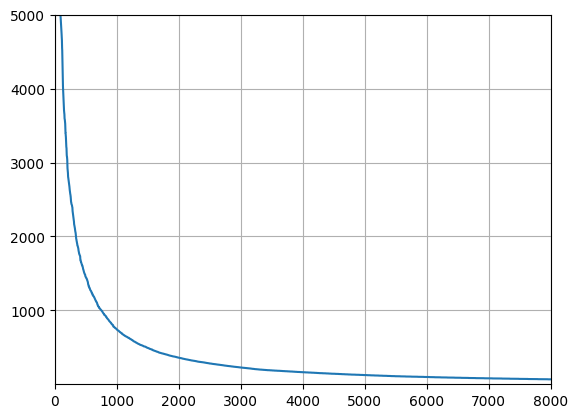

In [8]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
  answer1.append(i)
  answer2.append(features[i][1])

plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [9]:
#now we will use the 2000 words only as per frequencies
answer1=[features[i][0] for i in range(2000)]
answer1


['movie',
 'film',
 'not',
 'one',
 'like',
 'good',
 'would',
 'time',
 'story',
 'really',
 'see',
 'even',
 'much',
 'could',
 'well',
 'get',
 'bad',
 'people',
 'great',
 'made',
 'first',
 'make',
 'also',
 'way',
 'movies',
 'characters',
 'think',
 'character',
 'films',
 'seen',
 'watch',
 'many',
 'two',
 'plot',
 'acting',
 'life',
 'know',
 'never',
 'show',
 'love',
 'best',
 'little',
 'ever',
 'better',
 'scene',
 'end',
 'say',
 'scenes',
 'something',
 'still',
 'man',
 'back',
 'real',
 'thing',
 'actors',
 'watching',
 'years',
 'funny',
 'work',
 'old',
 'makes',
 'find',
 'actually',
 'going',
 'lot',
 'though',
 'director',
 'look',
 'part',
 'another',
 'nothing',
 'cast',
 'want',
 'quite',
 'around',
 'got',
 'seems',
 'thought',
 'things',
 'every',
 'pretty',
 'fact',
 'enough',
 'horror',
 'take',
 'long',
 'world',
 'young',
 'must',
 'give',
 'series',
 'role',
 'original',
 'action',
 'comedy',
 'gets',
 'right',
 'may',
 'times',
 'always',
 'whole',
 'm

In [10]:
type(x_train.shape)

tuple

In [11]:
#making x_train dataset
#no. of rows equivalent to rows in x_train and columns eql to no. of features
import numpy as np
x_train=np.array(x_train)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
  words=x_train[i].lower()
  stripped=re.split(r'\W+',words)
  for j in stripped:
    if j in answer1:
      x_train_dataset[i][answer1.index(j)]+=1


In [12]:
#making x_test dataset
x_test=np.array(x_test)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
  words=x_test[i].lower()
  stripped=re.split(r'\W+',words)
  for j in stripped:
    if j in answer1:
      x_test_dataset[i][answer1.index(j)]+=1


In [13]:
print(x_train_dataset)
print("----------------------------")
print(x_test_dataset)

[[ 1  0  0 ...  0  0  0]
 [ 3  3  3 ...  0  0  0]
 [20  1  0 ...  0  0  0]
 ...
 [ 0  1  1 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]]
----------------------------
[[0 1 1 ... 0 0 0]
 [2 3 3 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 4 ... 0 0 0]
 [4 0 2 ... 0 0 0]
 [0 2 1 ... 0 0 0]]


In [15]:
def fit(x_train_dataset,y_train):
  count={}
  total_word=0
  y_train=np.array(y_train)
  count["total_docs"]=len(y_train)
  classes=set(y_train)
  for i in classes:
    temp=0
    x_train_i=x_train_dataset[y_train==i]
    temp2=x_train_i.shape[0]
    count[i]={}
    for feature in answer1:
      l=(x_train_i[:,answer1.index(feature)]).sum()
      count[i][feature]=l
      temp+=l
    count[i]['word_in_class']=temp
    count[i]['length']=temp2

  return count

In [16]:
def probability(x_test,dic,i):
  prob=np.log(dic[i]['length'])-np.log(dic['total_docs'])
  feature=list(dic[i].keys())
  for j in range(len(feature)-2):
    xj=x_test[j]
    if xj==0:
      curr_prob=0
    else:
      num=dic[i][feature[j]]+1
      den=dic[i]['word_in_class']+len(dic[i].keys())-2
      curr_prob=np.log(num)-np.log(den)

    prob+=curr_prob
  return prob

In [17]:
def predict_for_single(x_test,dic):
  first_run=True
  classes=dic.keys()
  best_prob=0
  for i in classes:
    if i=="total_docs":
      continue
    prob=probability(x_test,dic,i)
    if first_run or prob>best_prob:
      best_prob=prob
      first_run=False
      best_class=i
  return best_class

In [18]:
def predict(x_test,dic):
  y_pred=[]
  for x in x_test:
    y_pred.append(predict_for_single(x,dic))
  return y_pred

In [24]:
def score(y_test,y_pred):
  count=0
  y_test=np.array(y_test)
  for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
      count+=1
  return count/len(y_pred)

In [20]:
dictionary=fit(x_train_dataset,y_train)
y_pred=predict(x_test_dataset,dictionary)

In [21]:
dictionary

{'total_docs': 40000,
 'positive': {'movie': 30266,
  'film': 33706,
  'not': 23320,
  'one': 21811,
  'like': 14203,
  'good': 12054,
  'would': 8962,
  'time': 10207,
  'story': 10341,
  'really': 8658,
  'see': 9822,
  'even': 7800,
  'much': 7320,
  'could': 5713,
  'well': 10215,
  'get': 6574,
  'bad': 2918,
  'people': 6877,
  'great': 10355,
  'made': 5964,
  'first': 7408,
  'make': 5231,
  'also': 8690,
  'way': 6274,
  'movies': 5619,
  'characters': 5712,
  'think': 5729,
  'character': 5610,
  'films': 6081,
  'seen': 5417,
  'watch': 5384,
  'many': 6128,
  'two': 5739,
  'plot': 3790,
  'acting': 3829,
  'life': 6515,
  'know': 4538,
  'never': 5122,
  'show': 5331,
  'love': 7001,
  'best': 6841,
  'little': 5216,
  'ever': 4334,
  'better': 3773,
  'scene': 4189,
  'end': 4236,
  'say': 3862,
  'scenes': 3936,
  'something': 3448,
  'still': 5107,
  'man': 5317,
  'back': 4040,
  'real': 4122,
  'thing': 2705,
  'actors': 3230,
  'watching': 3056,
  'years': 4345,
  'f

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("score of testing data",score(y_test,y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      5035
    positive       0.84      0.85      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[4219  816]
 [ 731 4234]]
score of testing data 0.8453
